In [35]:
import math
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from scipy.interpolate import pchip
from scipy import linalg
from scipy import interpolate
from scipy import integrate
%matplotlib inline

In [36]:
def cond(A, p=2):
    return linalg.norm(A, p)*linalg.norm(linalg.inv(A), p)

Создадим наши массивы. Создал разными способами ради эксперимента. Так же заполнили значения x и y по данному заданию. Вывели и нарисовали график

x[ 0 ] =  -0.1
y[ 0 ] =  -0.1124629160182849
x[ 1 ] =  0.0
y[ 1 ] =  0.0
x[ 2 ] =  0.1
y[ 2 ] =  0.1124629160182849
x[ 3 ] =  0.2
y[ 3 ] =  0.22270258921047845
x[ 4 ] =  0.3
y[ 4 ] =  0.3286267594591274
x[ 5 ] =  0.4
y[ 5 ] =  0.42839235504666845
x[ 6 ] =  0.5
y[ 6 ] =  0.5204998778130465
x[ 7 ] =  0.6
y[ 7 ] =  0.6038560908479258
x[ 8 ] =  0.7
y[ 8 ] =  0.6778011938374183
x[ 9 ] =  0.8
y[ 9 ] =  0.7421009647076605
x[ 10 ] =  0.9
y[ 10 ] =  0.7969082124228322


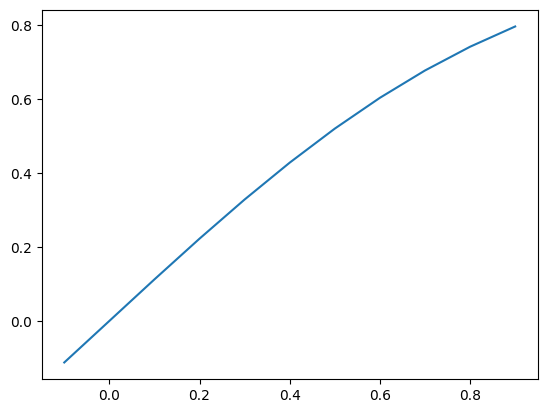

In [77]:
x = [0]*11
y = [0]*11
for i in range(11):
  x[i] = (i-1)/10
  print("x[",i,"] = ",x[i])
  y[i] = special.erf(x[i])
  print("y[",i,"] = ",y[i])

plt.plot(x,y)

Приступаем к интерполянту:

In [38]:
W = np.vander(x)
print(W)

[[ 1.00000000e-10 -1.00000000e-09  1.00000000e-08 -1.00000000e-07
   1.00000000e-06 -1.00000000e-05  1.00000000e-04 -1.00000000e-03
   1.00000000e-02 -1.00000000e-01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e-10  1.00000000e-09  1.00000000e-08  1.00000000e-07
   1.00000000e-06  1.00000000e-05  1.00000000e-04  1.00000000e-03
   1.00000000e-02  1.00000000e-01  1.00000000e+00]
 [ 1.02400000e-07  5.12000000e-07  2.56000000e-06  1.28000000e-05
   6.40000000e-05  3.20000000e-04  1.60000000e-03  8.00000000e-03
   4.00000000e-02  2.00000000e-01  1.00000000e+00]
 [ 5.90490000e-06  1.96830000e-05  6.56100000e-05  2.18700000e-04
   7.29000000e-04  2.43000000e-03  8.10000000e-03  2.70000000e-02
   9.00000000e-02  3.00000000e-01  1.00000000e+00]
 [ 1.04857600e-04  2.62144000e-04  6.55360000e-04  1.63840000e-03
   4.09600000e-03  

Создаем ещё два массива(а ещё нам помогла функция сверху(cond), которую мы сами написали), чтобы в итоге найти коэфиценты интерполянта.
А также нашли обусловленность:

In [39]:
print("cond (1): ",cond(W,1))
print("cond (2): ",cond(W,2))
print("cond (inf+): ",cond(W,np.inf))
f = np.polyfit(x, y, 10)
A = linalg.solve(W, y)

cond (1):  164641966.49723572
cond (2):  48418951.20180526
cond (inf+):  129250490.89295259


Значения довольно большие, так что думаю, что эта матрица близка к вырожденной

Далее находим погрешности:

In [40]:
for i in range(11):
  print("y[",i,"] = ",y[i]," and matrix: ",A[i])
  abs_err = abs(y[i]-A[i])
  print("Абсолютная ошибка: ",abs_err, " Относительная: ", abs_err / y[i])

y[ 0 ] =  -0.1124629160182849  and matrix:  -0.001815415076135621
Абсолютная ошибка:  0.11064750094214927  Относительная:  -0.9838576560131123
y[ 1 ] =  0.0  and matrix:  0.006991823947022289
Абсолютная ошибка:  0.006991823947022289  Относительная:  inf
y[ 2 ] =  0.1124629160182849  and matrix:  -0.0009063360789818732
Абсолютная ошибка:  0.11336925209726677  Относительная:  1.0080589772261863
y[ 3 ] =  0.22270258921047845  and matrix:  -0.026659051457702584
Абсолютная ошибка:  0.24936164066818103  Относительная:  1.1197069668215975
y[ 4 ] =  0.3286267594591274  and matrix:  1.42863495980174e-05
Абсолютная ошибка:  0.3286124731095294  Относительная:  0.9999565271263317
y[ 5 ] =  0.42839235504666845  and matrix:  0.1128191818505284
Абсолютная ошибка:  0.31557317319614003  Относительная:  0.7366452026478436
y[ 6 ] =  0.5204998778130465  and matrix:  3.5177640356945697e-06
Абсолютная ошибка:  0.5204963600490108  Относительная:  0.9999932415660682
y[ 7 ] =  0.6038560908479258  and matrix:  

<ipython-input-40-5c20d60d6323>:4: RuntimeWarning: divide by zero encountered in double_scalars
  print("Абсолютная ошибка: ",abs_err, " Относительная: ", abs_err / y[i])


In [41]:
print(f)
print("=================================")
print(A)

[-1.81541508e-03  6.99182397e-03 -9.06336099e-04 -2.66590515e-02
  1.42863635e-05  1.12819182e-01  3.51776639e-06 -3.76126475e-01
 -3.56818039e-08  1.12837917e+00 -1.88293971e-16]
[-1.81541508e-03  6.99182395e-03 -9.06336079e-04 -2.66590515e-02
  1.42863496e-05  1.12819182e-01  3.51776404e-06 -3.76126475e-01
 -3.56817841e-08  1.12837917e+00  0.00000000e+00]


В целом значения практически одинаковые. Есть только два "но":
1. Иногда значение незначительно отличаются, но погрешность минимальна
2. Последний коэфицент отличается сильно. В моём случае это ноль, а в случае другого массива - довольно убеждающее значение

Эрмитов интерполянт:

<ipython-input-84-f55e8cae2d63>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_interp, y_interp,  'or', color = 'tab:orange')


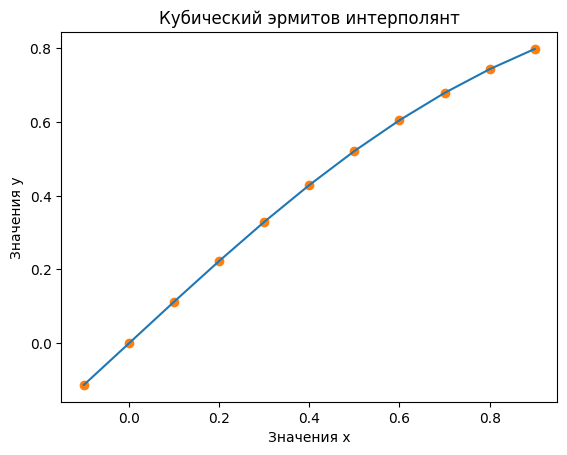

In [84]:
interp = pchip(x, y)

x_interp = np.linspace(-0.1, 0.9, 11)
y_interp = interp(x_interp)

plt.plot(x_interp, y_interp,  'or', color = 'tab:orange')
plt.plot(x, y)
plt.xlabel('Значения x')
plt.ylabel('Значения y')
plt.title('Кубический эрмитов интерполянт')
plt.show()


Видно сходимость с изначальным графиком, но есть слабые видимые отклонения

Кубический сплайн:

<ipython-input-72-149136645850>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'or', color = 'tab:orange')


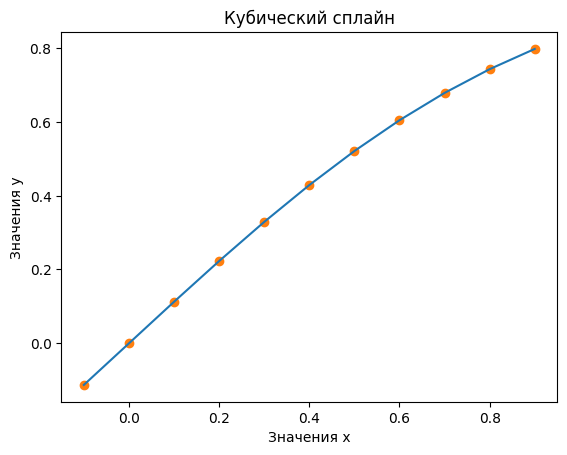

In [72]:
f = interpolate.interp1d(x, y, kind = 'cubic')
xx = np.linspace(-0.1, 0.9, 11)
yy = f(xx)
plt.plot(x, y, 'or', color = 'tab:orange')
plt.plot(xx, yy, color = 'tab:blue')
plt.xlabel('Значения x')
plt.ylabel('Значения y')
plt.title('Кубический сплайн')
plt.show()
pass

В принципе, отличий от прошлого графика (по крайней мере, визуально) я не замечаю

Так же делаем график зависимости числа обусловленности от степени многочлена:

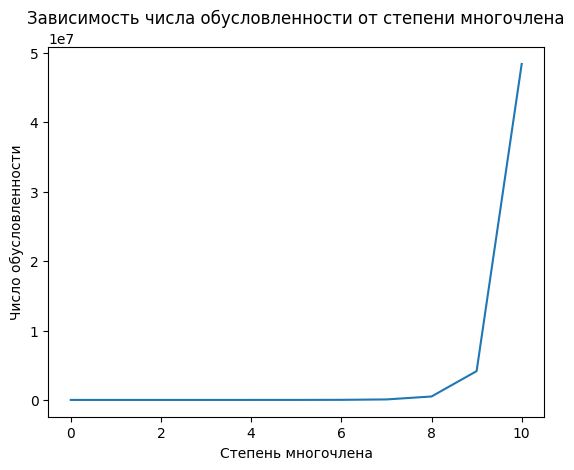

In [79]:
def func(x):
  return special.erf(x)
x_vals = np.linspace(-0.1, 0.9, 11)
cond_nums = []
for i in range(0, 11): 
    p = np.polyfit(x_vals, func(x_vals), i)
    V = np.vander(x_vals, i + 1, increasing=True)
    cond_nums.append(np.linalg.cond(V))

plt.plot(np.arange(0, 11), cond_nums)
plt.xlabel('Степень многочлена')
plt.ylabel('Число обусловленности')
plt.title('Зависимость числа обусловленности от степени многочлена')
plt.show()
